**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import matplotlib.dates as mdates
from datetime import datetime

**Reading the dataset**

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Entertainer - Basic Info.xlsx to Entertainer - Basic Info.xlsx
Saving Entertainer - Breakthrough Info.xlsx to Entertainer - Breakthrough Info.xlsx
Saving Entertainer - Last work Info.xlsx to Entertainer - Last work Info.xlsx


**Import File**

In [3]:
entertainer_basic = pd.read_excel('Entertainer - Basic Info.xlsx')
entertainer_basic.head()

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922


In [4]:
entertainer_Breakthrough = pd.read_excel('Entertainer - Breakthrough Info.xlsx')
entertainer_Breakthrough.head()

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0


In [5]:
entertainer_last_work = pd.read_excel('Entertainer - Last work Info.xlsx')
entertainer_last_work.head()

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN


In [6]:
#Found, how many rows and columns are there
entertainer_Breakthrough.shape

(70, 4)

**Merge All Data**

In [7]:
entertainer = pd.merge(entertainer_basic, entertainer_Breakthrough, on='Entertainer', how='outer')
entertainer = pd.merge(entertainer, entertainer_last_work, on='Entertainer', how='outer')

In [8]:
#Found, how many rows and columns are there
entertainer.shape
entertainer.head()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


**Rename the columns to get better understanding**

In [9]:
entertainer.rename(columns= {'Gender (traditional)' : 'Gender',
                             'Year of Breakthrough/#1 Hit/Award Nomination': 'Year of Hit Album',
                             'Breakthrough Name': 'Album Name',
                             'Year of First Oscar/Grammy/Emmy':'Year of First Award',
                             'Year of Last Major Work (arguable)':'Year of Last Work'}, inplace= True)

In [10]:
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album Name,Year of First Award,Year of Last Work,Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


**Checked Duplicate Values**

In [11]:
entertainer.duplicated().sum()

0

**Checked NaN Values to Maintain Data Quality**

In [12]:
entertainer.isna().sum()

,0
Entertainer,0
Gender,0
Birth Year,0
Year of Hit Album,0
Album Name,0
Year of First Award,6
Year of Last Work,0
Year of Death,40


**Check Data Types of All The Columns**

In [13]:
entertainer.dtypes

,0
Entertainer,object
Gender,object
Birth Year,int64
Year of Hit Album,int64
Album Name,object
Year of First Award,float64
Year of Last Work,int64
Year of Death,float64


**Filled The NaN Values with Mode of The Column as It is Categorical Data**

In [14]:
entertainer['Year of Death'].fillna(entertainer['Year of Last Work'], inplace = True)

In [15]:
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album Name,Year of First Award,Year of Last Work,Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,2016.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,2016.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,2014.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,2016.0


In [16]:
entertainer['Year of First Award'].fillna(entertainer['Year of Hit Album'], inplace = True)
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album Name,Year of First Award,Year of Last Work,Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,2016.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,2016.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,2014.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,2016.0


In [17]:
entertainer.isna().sum()

,0
Entertainer,0
Gender,0
Birth Year,0
Year of Hit Album,0
Album Name,0
Year of First Award,0
Year of Last Work,0
Year of Death,0


In [18]:
#In age column to find other information

entertainer['Age'] = entertainer['Year of Death'] - entertainer['Birth Year']
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album Name,Year of First Award,Year of Last Work,Year of Death,Age
0,Adele,F,1988,2008,19,2009.0,2016,2016.0,28.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,2016.0,41.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,2014.0,72.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0,81.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,2016.0,94.0


In [19]:
#Here will convert the float64 value to int64 to avoid decimal points.
entertainer['Year of First Award'] = entertainer['Year of First Award'].astype('int64')
entertainer['Year of Death'] = entertainer['Year of Death'].astype('int64')
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album Name,Year of First Award,Year of Last Work,Year of Death,Age
0,Adele,F,1988,2008,19,2009,2016,2016,28.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999,2016,2016,41.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968,2014,2014,72.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935,1989,1989,81.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976,2016,2016,94.0


**Adding some required columns to dataframe for analysis**

In [20]:
entertainer['First_Hit(Age)'] = entertainer['Year of Hit Album'] - entertainer['Birth Year']
entertainer['First_Award(Age)'] = entertainer['Year of First Award'] - entertainer['Birth Year']
entertainer['Career Duration'] = entertainer['Year of Last Work'] - entertainer['Year of Hit Album']
entertainer['Lifetime(Till Death)'] = entertainer['Year of Death'] - entertainer['Birth Year']
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album Name,Year of First Award,Year of Last Work,Year of Death,Age,First_Hit(Age),First_Award(Age),Career Duration,Lifetime(Till Death)
0,Adele,F,1988,2008,19,2009,2016,2016,28.0,20,21,8,28
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999,2016,2016,41.0,24,24,17,41
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968,2014,2014,72.0,25,26,47,72
3,Bette Davis,F,1908,1934,Of Human Bondage,1935,1989,1989,81.0,26,27,55,81
4,Betty White,F,1922,1952,Life with Elilzabeth,1976,2016,2016,94.0,30,54,64,94


**Comparing general break through ages and first award ages**

In [21]:
ages = entertainer[['Entertainer', 'First_Hit(Age)', 'First_Award(Age)']]
career = entertainer[['Entertainer', 'Career Duration', 'Lifetime(Till Death)']]
ages.head(),career.head()

(       Entertainer  First_Hit(Age)  First_Award(Age)
 0            Adele              20                21
 1   Angelina Jolie              24                24
 2  Aretha Franklin              25                26
 3      Bette Davis              26                27
 4      Betty White              30                54,
        Entertainer  Career Duration  Lifetime(Till Death)
 0            Adele                8                    28
 1   Angelina Jolie               17                    41
 2  Aretha Franklin               47                    72
 3      Bette Davis               55                    81
 4      Betty White               64                    94)

<Figure size 1000x600 with 0 Axes>

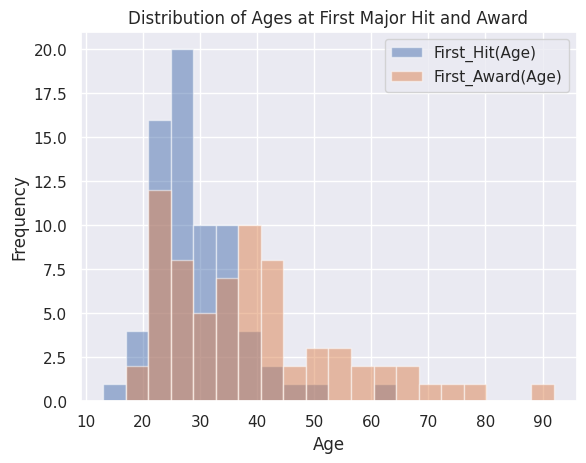

In [22]:
# Chart Ages at First Major Hit and Award

plt.figure(figsize=(10, 6))
ages[['First_Hit(Age)', 'First_Award(Age)']].plot(kind='hist', alpha=0.5, bins=20)
plt.title('Distribution of Ages at First Major Hit and Award')
plt.xlabel('Age')
plt.show()


* From the given Dataset it is understood that most Entertainers get have their first major hit between the ages 20-30 and Generally win awards in the range of ages 20-40

**Now look at the population**

<ipython-input-23-a0fb68d69257>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = entertainer, x = 'Gender', palette = 'Set2')


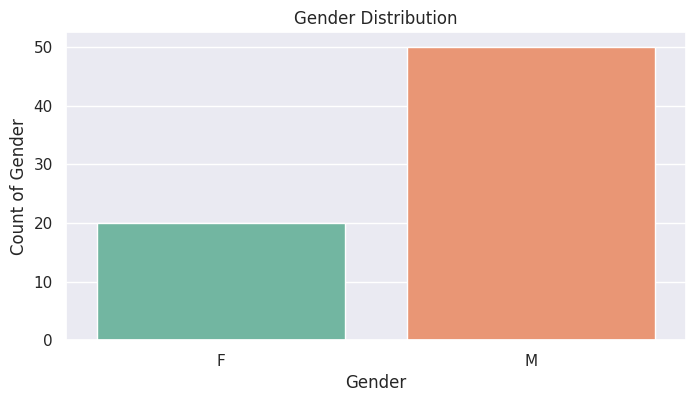

In [23]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = entertainer, x = 'Gender', palette = 'Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.show()

Here let us take a look at the male female proportion of the dataset.

**A gender based comparision of ages at first hit and first award**

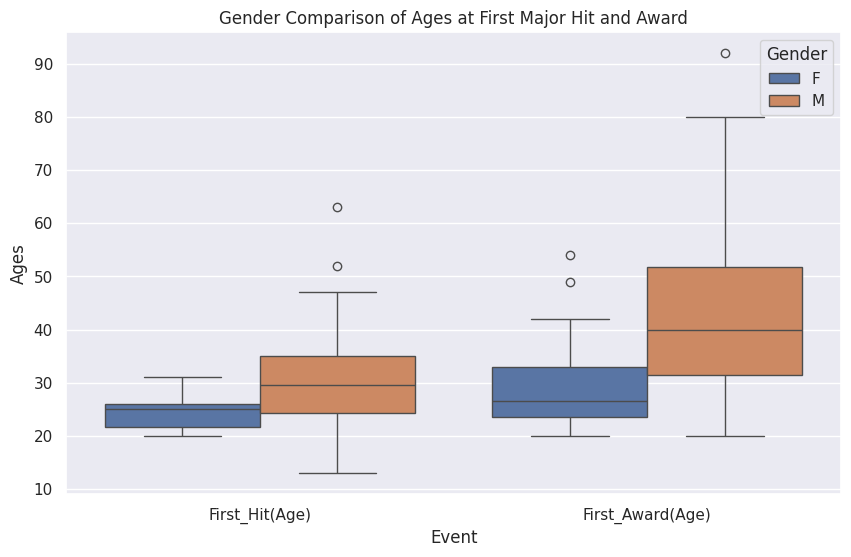

In [24]:
ages_melted = entertainer.melt(id_vars=['Entertainer', 'Gender'], value_vars=['First_Hit(Age)', 'First_Award(Age)'], var_name='Event', value_name='Ages')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Event', y='Ages', hue='Gender', data=ages_melted)
plt.title('Gender Comparison of Ages at First Major Hit and Award')
plt.show()

* It is observed that women seem to have their first hit at the age range of early to late 20s wheras for men this range is from mid 20s to mid 30s

* Women also win awards earlier then men which is between the age range of mid 20s to mid 30s the difference is quite stark when compared to men who seem star winning awards at the ages ranging from mid 30s to early 50s

**Finding top actors**

In [25]:
#Ranking based upon age difference of first hit and first award and age at first hit
grp_hist = entertainer[['Entertainer','First_Award(Age)','First_Hit(Age)']]
grp_hist['Age_Difference'] = entertainer['First_Award(Age)'] - entertainer['First_Hit(Age)']
grp_hist=grp_hist[grp_hist['Age_Difference']>=0]
grp_hist = grp_hist.sort_values(by=['Age_Difference','First_Hit(Age)']).head(10)
grp_hist['Rank'] = np.arange(1, 11)
grp_hist

<ipython-input-25-6262511e81fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_hist['Age_Difference'] = entertainer['First_Award(Age)'] - entertainer['First_Hit(Age)']


,Entertainer,First_Award(Age),First_Hit(Age),Age_Difference,Rank
15,Debbie Reynolds,20,20,0,1
9,Carrie Fisher,21,21,0,2
12,Clara Bow,21,21,0,3
1,Angelina Jolie,24,24,0,4
40,Johnny Depp,24,24,0,5
8,Carole Lombard,26,26,0,6
42,Katherine Hepburn,26,26,0,7
67,Wayne Newton,30,30,0,8
13,Clark Gable,33,33,0,9
16,Denzel Washington,35,35,0,10


Here the sorting first done on the basis of difference in age from their first hit to first award and the based upon their age when they had their first hit

Here Debbie Reynolds is first. She had her first hit at the age of 21 and won a major award in the same year. Carrie Fisher also has won a major in the same year as the her first hit, yet she falls second due to the fact that her first hit was when she was at age 21

In [26]:
#Calculating based on era
eras = {
    '1900-1909': (1900, 1909),
    '1910-1919': (1910, 1919),
    '1920-1929': (1920, 1929),
    '1930-1939': (1930, 1939),
    '1940-1949': (1940, 1949),
    '1950-1959': (1950, 1959),
    '1960-1969': (1960, 1969),
    '1970-1979': (1970, 1979),
    '1980-1989': (1980, 1989),
    '1990-1999': (1990, 1999),
    '2000-2009': (2000, 2009),
    '2010-2020': (2010, 2020)
}
def get_top_actor_for_era(entertainer, era_range, metric='Career Duration'):
    start_year, end_year = era_range

    filtered = entertainer[(entertainer['Year of Hit Album'] >= start_year) & (entertainer['Year of Hit Album'] <= end_year)]

    if filtered.empty:
        return None

    if metric == 'Career Duration':
        filtered['Career Duration'] = filtered['Year of Last Work'] - filtered['Year of Hit Album']
        top_actor = filtered.loc[filtered['Career Duration'].idxmax(), 'Entertainer']

    return top_actor


top_actors = {era: get_top_actor_for_era(entertainer, years) for era, years in eras.items()}
top_actors = {era: actor for era, actor in top_actors.items() if actor is not None}
top_actors_df = pd.DataFrame.from_dict(top_actors, orient='index', columns=['Top Actor'])
top_actors_df.index.name = 'Era'
top_actors_df

<ipython-input-26-5019f207f961>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Career Duration'] = filtered['Year of Last Work'] - filtered['Year of Hit Album']
<ipython-input-26-5019f207f961>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Career Duration'] = filtered['Year of Last Work'] - filtered['Year of Hit Album']
<ipython-input-26-5019f207f961>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Top Actor
Era,
1910-1919,Charlie Chaplin
1920-1929,Joan Crawford
1930-1939,Katherine Hepburn
1940-1949,Kirk Douglas
1950-1959,Tony Bennett
1960-1969,Dick Van Dyke
1970-1979,Elton John
1980-1989,Eddie Murphy
1990-1999,Will Smith


Here the various details about the entertainers was understood. first we saw the general age range at which most entertainers have their first hit and the their first award. We then did a gender based comparison of first hits and first awards which gave alot of insights. We also looked at top entertainers in the dataset and finally did a era wise listing of seeing which celebrity was at their best during various eras

In [27]:
# Know about Entertainer

def get_entertainer_info(entertainer_name):
  """
  Retrieves information about a specific entertainer from the DataFrame.

  Args:
    entertainer_name: The name of the entertainer.

  Returns:
    A pandas Series containing information about the entertainer, or None if not found.
  """
  entertainer_info = entertainer[entertainer['Entertainer'] == entertainer_name]
  if not entertainer_info.empty:
    return entertainer_info.iloc[0]
  else:
    return None

def compare_gender_age_at_events(entertainer_data):
  """
  Compares the ages of male and female entertainers at their first hit and first award.

  Args:
    entertainer_data: The pandas DataFrame containing entertainer information.
  """
  ages_melted = entertainer_data.melt(id_vars=['Entertainer', 'Gender'],
                                    value_vars=['First_Hit(Age)', 'First_Award(Age)'],
                                    var_name='Event', value_name='Ages')


while True:
  entertainer_name = input("Enter the name of an entertainer (or 'quit' to exit): ")
  if entertainer_name.lower() == 'quit':
    break

  entertainer_info = get_entertainer_info(entertainer_name)
  if entertainer_info is not None:
    print(entertainer_info)
  else:
    print(f"Entertainer '{entertainer_name}' not found in the dataset.")

Enter the name of an entertainer (or 'quit' to exit): Elton John
Entertainer                Elton John
Gender                              M
Birth Year                       1947
Year of Hit Album                1972
Album Name              Honky Chateau
Year of First Award              1987
Year of Last Work                2016
Year of Death                    2016
Age                              69.0
First_Hit(Age)                     25
First_Award(Age)                   40
Career Duration                    44
Lifetime(Till Death)               69
Name: 22, dtype: object
Enter the name of an entertainer (or 'quit' to exit): quit


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=99f569397232b4c9abe7a3a4efe43a6901323da7c9c43988ffaa83d72779cd53
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


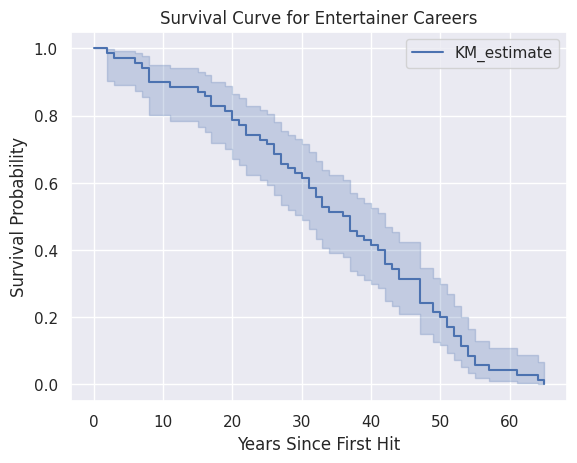

In [28]:
!pip install lifelines

from lifelines import KaplanMeierFitter

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model to the data (assuming 'Career Duration' is the time to event and 'Year of Death' indicates censoring)
T = entertainer['Career Duration']
E = entertainer['Year of Death'].notna()  # Censoring indicator (True if death observed, False otherwise)
kmf.fit(T, event_observed=E)

# Plot the survival curve
kmf.plot()
plt.title('Survival Curve for Entertainer Careers')
plt.xlabel('Years Since First Hit')
plt.ylabel('Survival Probability')
plt.show()

# This is just a starting point. Adapt and expand these suggestions based on the specific data available and research questions of interest.


In [29]:
entertainer.head()

,Entertainer,Gender,Birth Year,Year of Hit Album,Album Name,Year of First Award,Year of Last Work,Year of Death,Age,First_Hit(Age),First_Award(Age),Career Duration,Lifetime(Till Death)
0,Adele,F,1988,2008,19,2009,2016,2016,28.0,20,21,8,28
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999,2016,2016,41.0,24,24,17,41
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968,2014,2014,72.0,25,26,47,72
3,Bette Davis,F,1908,1934,Of Human Bondage,1935,1989,1989,81.0,26,27,55,81
4,Betty White,F,1922,1952,Life with Elilzabeth,1976,2016,2016,94.0,30,54,64,94


<ipython-input-30-b50f497b25e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Year of Hit Album'] = pd.to_datetime(time_series_data['Year of Hit Album'], format='%Y')
<ipython-input-30-b50f497b25e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['Year of First Award'] = pd.to_datetime(time_series_data['Year of First Award'], format='%Y')
<ipython-input-30-b50f497b25e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

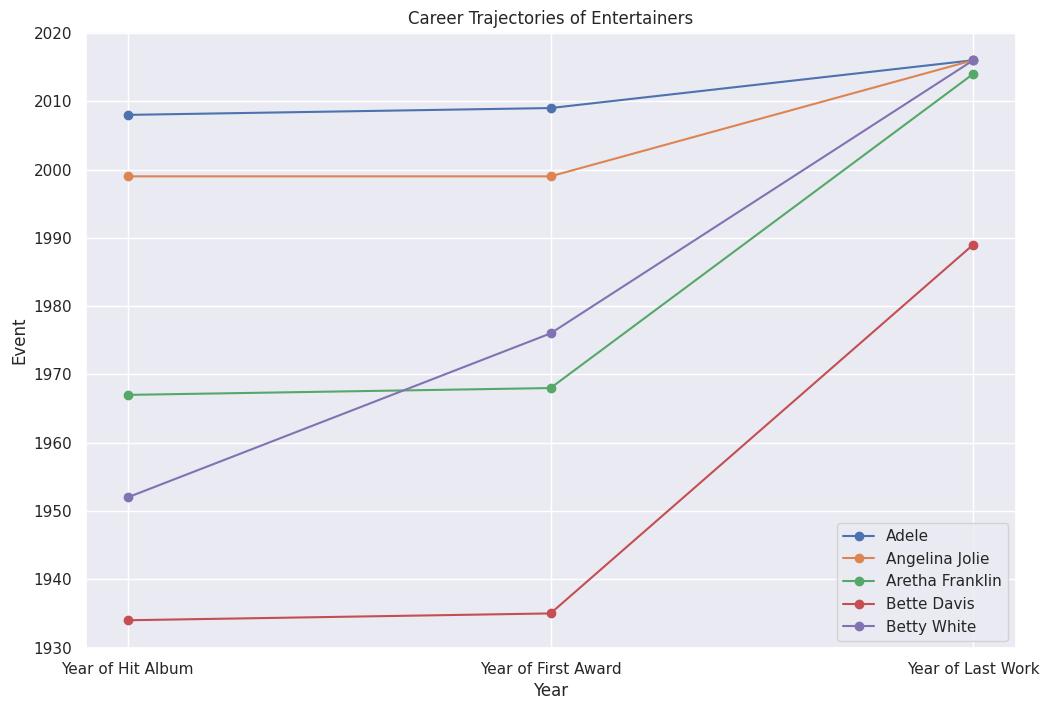

In [30]:
# Time Series Analysis of Career Trajectories

# Use the 'entertainer' DataFrame instead of 'career'
time_series_data = entertainer[['Entertainer', 'Year of Hit Album', 'Year of First Award', 'Year of Last Work']]

# Convert years to datetime objects for time series plotting
time_series_data['Year of Hit Album'] = pd.to_datetime(time_series_data['Year of Hit Album'], format='%Y')
time_series_data['Year of First Award'] = pd.to_datetime(time_series_data['Year of First Award'], format='%Y')
time_series_data['Year of Last Work'] = pd.to_datetime(time_series_data['Year of Last Work'], format='%Y')

# Set 'Entertainer' as index
time_series_data.set_index('Entertainer', inplace=True)

# Plot career trajectories for a few entertainers
plt.figure(figsize=(12, 8))
for entertainer in time_series_data.index[:5]:  # Plot for the first 5 entertainers
  plt.plot(time_series_data.loc[entertainer], marker='o', label=entertainer)

plt.title('Career Trajectories of Entertainers')
plt.xlabel('Year')
plt.ylabel('Event')
plt.legend()
plt.grid(True)
plt.show()

Here shows 5 entertainer Carrer Trajectories.